In [5]:
# 계단함수 구현
def step_function(x) :
    if x > 0 :
        return 1
    else :
        return 0

In [6]:
# 계단함수의 parameter에 배열을 넣고싶으면?
import numpy as np
def step_function(x) :
    y = x > 0
    return y.astype(np.int)

In [7]:
import numpy as np
x = np.array([-1.0, 1.0, 2.0])
y = x > 0 # bool 배열
print(y)
y = y.astype(np.int32)
print(y)

[False  True  True]
[0 1 1]


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  


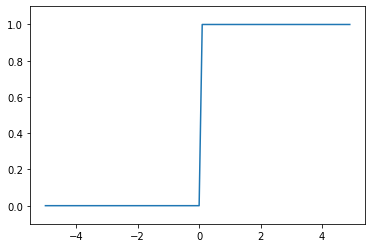

In [8]:
# 계단함수 그래프 그리기
import numpy as np
import matplotlib.pylab as plt

def step_function(x) :
    return np.array(x > 0, dtype = np.int)

x = np.arange(-5.0, 5.0, 0.1)
y = step_function(x)
plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

In [9]:
# 시그모이드 함수 구현
def sigmoid(x) :
    y = 1 / (1 + np.exp(-x)) # x : numpy arr => np.exp(x) : numpy arr => sigmoid(x) : numpy arr(broadcast)
    return y

x = np.array([-1.0, 1.0, 2.0])
sigmoid(x)

array([0.26894142, 0.73105858, 0.88079708])

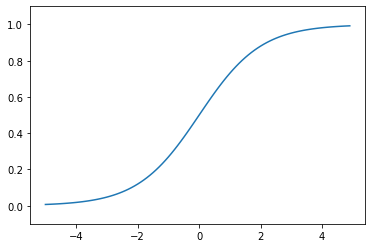

In [10]:
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.ylim(-0.1, 1.1)
plt.show()

# 비선형 함수
신경망에서는 활성화 함수를 비선형 함수로 해야 하는데, 그 이유는 선형함수를 이용하게 되면 신경망의 층을 깊게 하는 의미가 없어지기 때문이다.
예를 들면, $f(x) = cx$ 라는 함수를 생각해 보자. 이 함수를 활성화 함수로 3개의 층을 구성한다면, $y(x) = f(f(f(x)))$가 되는데, 이는 $y(x) = c * c * c * x$와 같고, $c^3$을 $c$로 치환하면 $y(x) = c * x$가 되므로 의미가 없어진다.

# ReLU 함수
0 이하면 0을 출력하고, 0 이상이면 입력을 그대로 출력하는 함수이다.

In [11]:
# ReLU 함수
def relu(x) :
    return np.maximum(0, x)

# 다차원 배열의 계산

In [12]:
# 1차원 배열
import numpy as np
A = np.array([1, 2, 3, 4])
print(A)
print("행렬의 차원 : ", np.ndim(A)) # 행렬 A의 차원
print("행렬의 형태 : ", A.shape)    # 행렬 A의 모양(튜플 반환)
print(A.shape[0])

[1 2 3 4]
행렬의 차원 :  1
행렬의 형태 :  (4,)
4


In [13]:
# 2치원 배열
B = np.array([[1, 2], [3, 4], [5, 6]])
print(B)
print(np.ndim(B))
print("행렬의 형태 : ",B.shape)

[[1 2]
 [3 4]
 [5 6]]
2
행렬의 형태 :  (3, 2)


In [14]:
# 행렬의 곱
A = np.array([[1, 2], [3, 4]])
B = np.array([[5, 6], [7, 8]])
np.dot(A, B)

array([[19, 22],
       [43, 50]])

In [15]:
# 3층 신경망의 각 층 신호전달 구현
# 1층
X = np.array([1.0, 0.5])
W1 = np.array([[0.1, 0.3, 0.5],
               [0.2, 0.4, 0.6]])
B1 = np.array([0.1, 0.2, 0.3])

print(X.shape)
print(W1.shape)
print(B1.shape)

A1 = np.dot(X, W1) + B1
print(A1)

(2,)
(2, 3)
(3,)
[0.3 0.7 1.1]


In [16]:
# 2층
Z1 = sigmoid(A1)
W2 = np.array([[0.1, 0.4], 
               [0.2, 0.5], 
               [0.3, 0.6]])
B2 = np.array([0.1, 0.2])

A2 = np.dot(Z1, W2) + B2
Z2 = sigmoid(A2)

print(A2)
print(Z2)

[0.51615984 1.21402696]
[0.62624937 0.7710107 ]


In [17]:
# 3층
def identify_function(x) :
    return x

W3 = np.array([[0.1, 0.3], 
               [0.2, 0.4]])
B3 = np.array([0.1, 0.2])

A3 = np.dot(Z2, W3) + B3
Y = identify_function(A3)
print(Y)

[0.31682708 0.69627909]


In [18]:
# 함수로 구현
def init_neuron() :
    network = {}
    network['W1'] = np.array([[0.1, 0.3, 0.5], 
                              [0.2, 0.4, 0.6]])
    network['b1'] = np.array([0.1, 0.2, 0.3])
    network['W2'] = np.array([[0.1, 0.4], 
                              [0.2, 0.5], 
                              [0.3, 0.6]])
    network['b2'] = np.array([0.1, 0.2])
    network['W3'] = np.array([[0.1, 0.3], 
                              [0.2, 0.4]])
    network['b3'] = np.array([0.1, 0.2])
    
    return network
    
def forward(network, x) :
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = sigmoid(a3)
    
    return y
    
    
network = init_neuron()
x = np.array([0.1, 0.5])
y = forward(network, x)
print(y)

[0.57745812 0.66514693]


In [19]:
# 소프트맥스 함수 구현
def softmax(a) :
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

# 소프트맥스 함수의 문제점
컴퓨터에서 소프트맥스 함수를 계산을 할 때, 오퍼플로우의 문제가 발생 => 오버플로우를 방지하기 위해 입력 신호 중 최댓값을 이용한다.

In [20]:
a = np.array([1010, 1000, 990])
y = np.exp(a) / np.sum(np.exp(a))
print(y) # 오버플로우 발생

max_a = np.max(a)
a = a - max_a
y = np.exp(a) / np.sum(np.exp(a))
print(y)

[nan nan nan]
[9.99954600e-01 4.53978686e-05 2.06106005e-09]


C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: overflow encountered in exp
  
C:\Users\User\anaconda3\lib\site-packages\ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in true_divide
  


In [21]:
def softmax(a) :
    max_a = np.max(a)
    a = a - max_a
    exp_a = np.exp(a)
    sum_exp_a = np.sum(exp_a)
    y = exp_a / sum_exp_a
    
    return y

In [22]:
a = np.array([0.3, 2.9, 4.0])
y = softmax(a)
print(y)
print(np.sum(y))

[0.01821127 0.24519181 0.73659691]
1.0


In [36]:
# 손글씨 숫자 인식
import sys, os
sys.path.append(os.pardir)
from dataset.mnist import load_mnist

(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten = True, normalize = False)

# 각 데이터의 형상 출력
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)


(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [38]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from dataset.mnist import load_mnist
from PIL import Image

def img_show(img) :
    # 넘파이로 저장된 이미지 데이터를 PIL용 데이터 객체로 뱐환해야 한다. => Image.fromarray()가 수행
    pil_img = Image.fromarray(np.uint8(img))
    pil_img.show()

# (훈련이미지, 훈련레이블), (시험이미지, 시험레이블)
(x_train, t_train), (x_test, t_test) = \
    load_mnist(flatten = True, normalize = False) 
    # flatten = True : 이미지 1차원 넘파이 배열로 저장 => 이미지 표시할 때 원래 형상으로 변형해야 함
    # normalize : 입력 이미지의 픽셀 값을 0.0 ~ 1.0 사이의 값으로 정규화
img = x_train[0]
label = t_train[0]
print(label)

print(img.shape)
img = img.reshape(28, 28) # flatten 했던 픽셀을 원래 이미지로 바꿈
print(img.shape)

img_show(img)


5
(784,)
(28, 28)


In [29]:
# 신경망의 추론처리
import pickle
def get_data() :
    (x_train, t_train), (x_test, t_test) = \
        load_mnist(normalize = True, flatten = True, one_hot_label = False)
    return x_test, t_test

def init_network() :
    # pickle 파일인 sample_weight.pkl에 저장된 학습된 가중치 매개변수를 읽는다.
    # 이 파일엔 가중치와 편향 매개변수가 딕셔너리 변수로 저장돼있다.
    with open("C:/Users/User/deep-learning-from-scratch-master/ch03/sample_weight.pkl", 'rb') as f :
        network = pickle.load(f)
        
    return network

def predict(network, x) :
    W1, W2, W3 = network['W1'], network['W2'], network['W3']
    b1, b2, b3 = network['b1'], network['b2'], network['b3']
    
    a1 = np.dot(x, W1) + b1
    z1 = sigmoid(a1)
    a2 = np.dot(z1, W2) + b2
    z2 = sigmoid(a2)
    a3 = np.dot(z2, W3) + b3
    y = softmax(a3)
    
    return y

In [30]:
x, t = get_data()
network = init_network()

accuracy_cnt = 0
for i in range(len(x)) :
    y = predict(network, x[i])
    p = np.argmax(y)
    if p == t[i] :
        accuracy_cnt += 1
        
print("Accuracy : " + str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9352


In [31]:
x, _ = get_data()
network = init_network()
W1, W2, W3 = network['W1'], network['W2'], network['W3'] 

print(x.shape) # 28 x 28 = 784 (flatten)
print(x[0].shape)
print(W1.shape)
print(W2.shape)
print(W3.shape)

(10000, 784)
(784,)
(784, 50)
(50, 100)
(100, 10)


In [33]:
x, t = get_data()
network = init_network()

batch_size = 100
accuracy_cnt = 0

for i in range(1, len(x), batch_size) :
    x_batch = x[i : i + batch_size]
    y_batch = predict(network, x_batch)
    p = np.argmax(y_batch, axis = 1)
    accuracy_cnt += np.sum(p == t[i : i + batch_size])
    
print("Accuracy : " + str(float(accuracy_cnt) / len(x)))

Accuracy : 0.9351


In [ ]:
start = int(input())
end = int(input())

def is_prime(n) :
    if n < 2 : 
        return False
    elif n == 2 :
        return True
    else :
        for i in range(2, int(n ** 0.5) + 1) :
            if (num % i == 0) :
                return False
    return True

prime = []
for num in range(start, end + 1) :
    if (is_prime(num)) :
        prime.append(num)
        
print(sum(prime))
print(min(prime))